In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: xlabel='Age', ylabel='Count'>

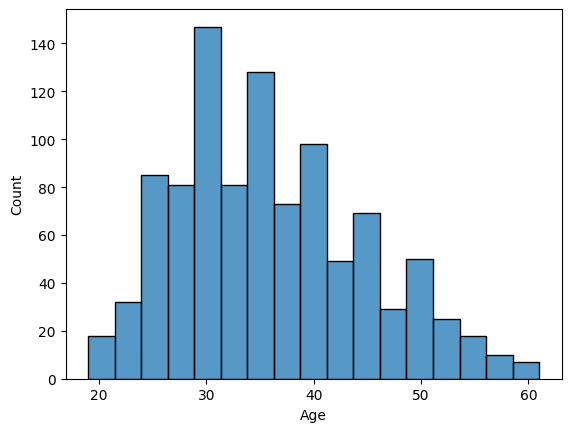

In [9]:
sns.histplot(ad_data['Age'])

**Create a jointplot showing Area Income versus Age.**

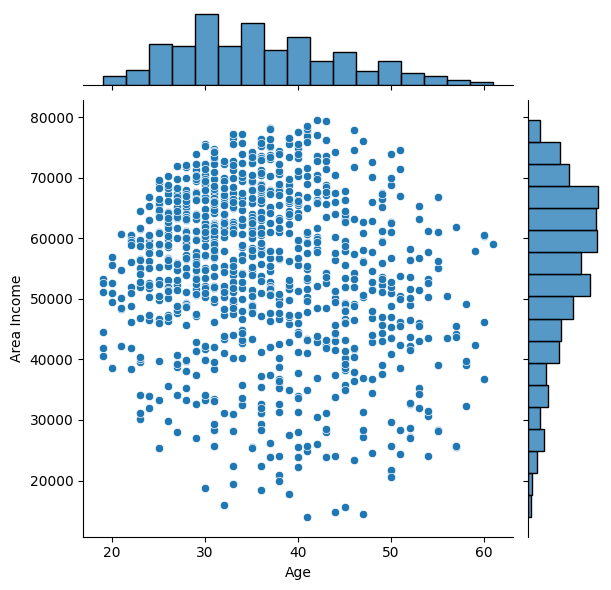

In [10]:
sns.jointplot(data=ad_data, x='Age',y='Area Income')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

c:\Users\91620\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
c:\Users\91620\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


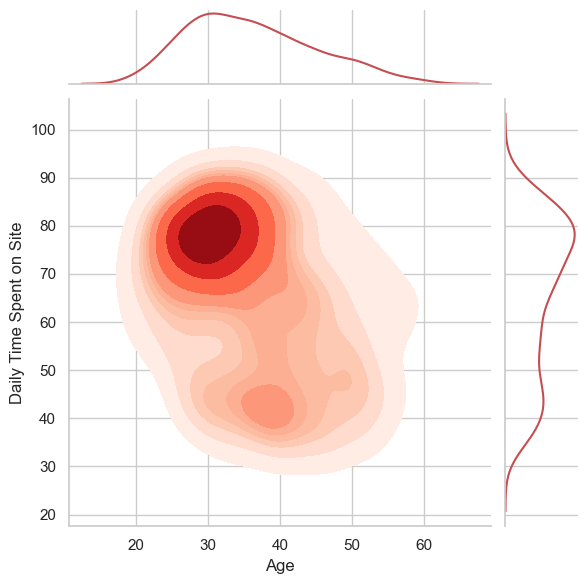

In [20]:
sns.set(style="whitegrid")
sns.jointplot(shade_lowest=False,cmap='Reds',color='r', shade=True,data=ad_data, x ='Age',y ="Daily Time Spent on Site", kind="kde")

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

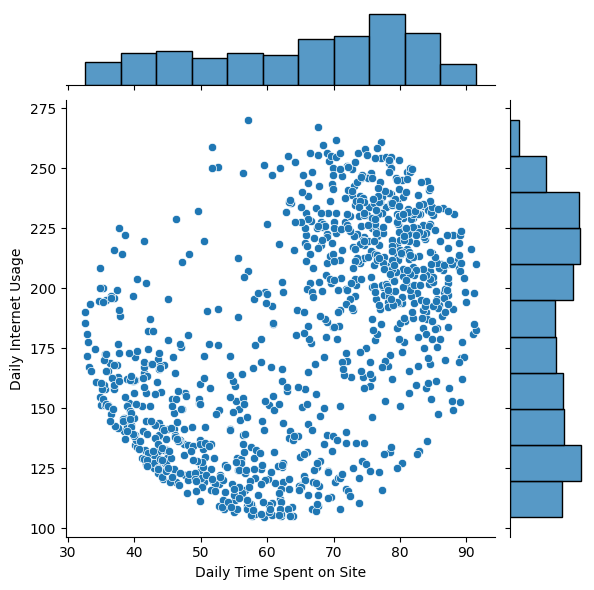

In [14]:
sns.jointplot(data=ad_data,x = 'Daily Time Spent on Site', y='Daily Internet Usage')

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

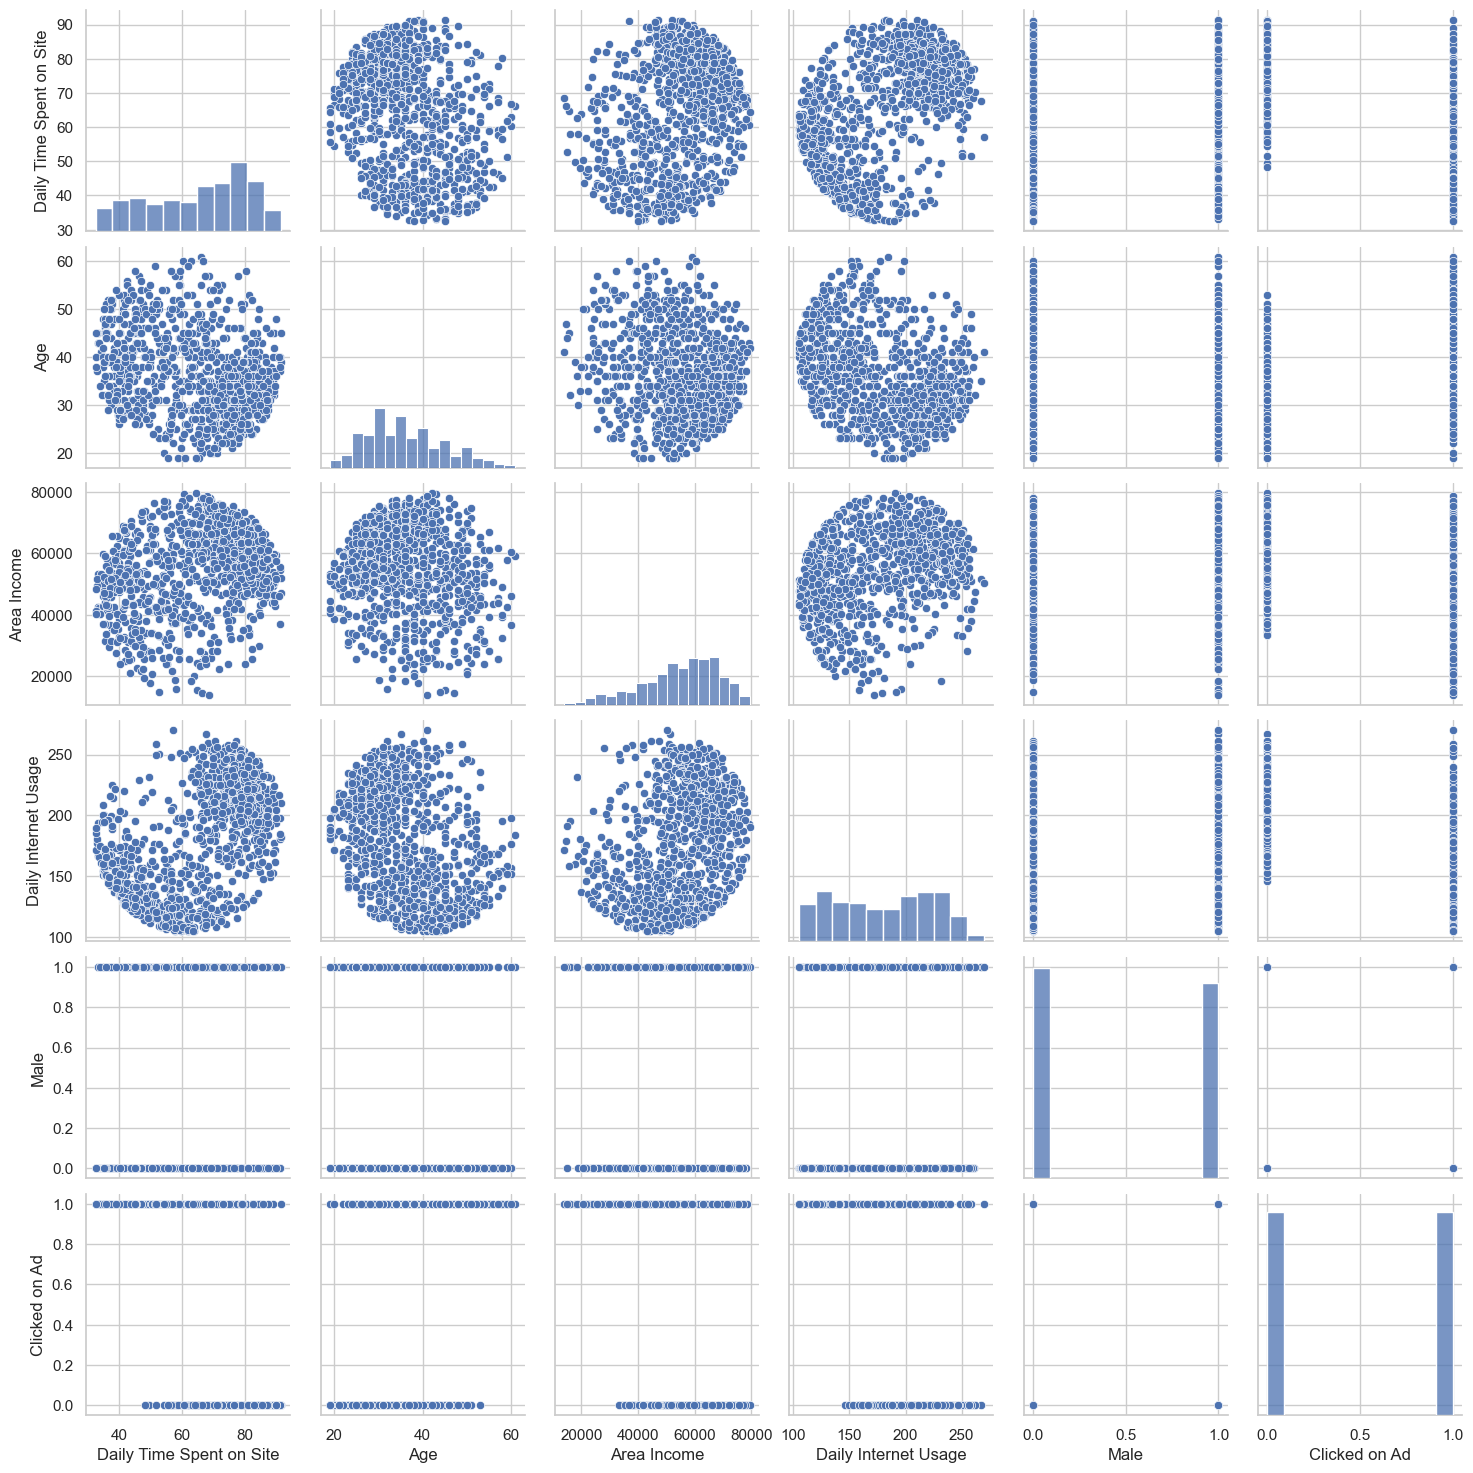

In [116]:
sns.pairplot(data=ad_data)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [117]:
from sklearn.model_selection import train_test_split

In [123]:
feat = ad_data[['Daily Internet Usage','Daily Time Spent on Site']]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(feat,ad_data['Clicked on Ad'],test_size=0.30, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [125]:
from sklearn.linear_model import LogisticRegression

In [127]:
logmodel = LogisticRegression(max_iter = 10000)
logmodel.fit(X_train,y_train)
# make sure to reshape single feature data using reshape(-1,1)

LogisticRegression(max_iter=10000)

## Predictions and Evaluations
**Now predict values for the testing data.**

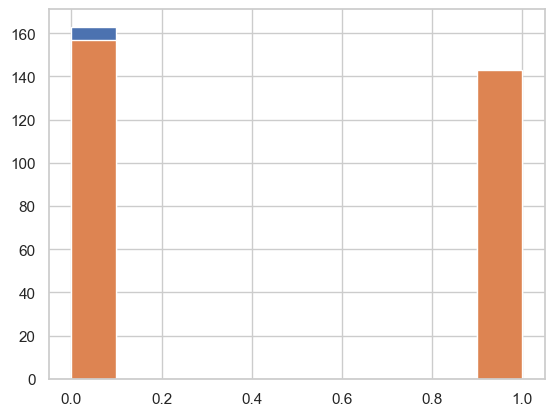

In [128]:
predictions = logmodel.predict(X_test)
# model mein jo feed krna hai karo, it will return
# the expected values, which you can use anywhere!
predictions
plt.hist(predictions)
plt.hist(y_test)
plt.show()

**Create a classification report for the model.**

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.97      0.93      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Great Job!